# Common Use Cases when dealing with Hypothesis Testing

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## USE-CASE: Testing Proportions 

### Is coin biased ?
- We toss coin 250 times, 140 heads, 120 tails. 

In [197]:
# se have:
n_h = 140
n_t = 110
observations = (n_h, n_t)
n_observations = n_h + n_t
print observations, n_observations, 

(140, 110) 250


In [198]:
# We define the null hypothesis and the test statistic

def run_null_hypothesis(n_observations):
    """the model of Null hypothesis"""
    sample = [random.choice('HT') for _ in range(n_observations)]
    df = pd.DataFrame(sample)
    value_counts = df[0].value_counts()
    n_heads = value_counts['H']
    n_tails = value_counts['T']
    return (n_heads, n_tails)

def test_statistic((n_heads, n_tails)):
    """Computes the test statistic"""
    return abs(n_heads - n_tails)

In [199]:
test_stat_H0 = test_statistic(run_null_hypothesis(n_observations))
test_stat_H1 = test_statistic(observations)

print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 18
Test Statistic for Hypothesis H1: 30


In [200]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(run_null_hypothesis(n_observations)) for _ in range(N_ITER)]

p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.068


In the example above, like most of what will follow, we used the MC way to evaluate the p-value.
Nevertheless, in many cases we can analytically, with the frequentist approach have an evaluation of the p-value.
Below is show the way of getting a p-value using the Probability Mass Function (pmf) of the binomial distribution.
The sucess (heads is up) process follows a Binomial distribution 
X ~ B(n,p)
where n is the number of flips and p is the prob. of success (heads up) in each flip

From the classical Hypothesis Test, the p-value will correspond to the probability of getting the effect we see (or even a more rare effect) under the Null Hypothesis.

Here the H0 is that the coin is not biased => p=0.5
And we have to sum up the probabilities (using the pmf) that we see k=

In [238]:
p = 0
for i in range(140, 250):
    p += stats.distributions.binom.pmf(k,  250, 0.5)
pval = 1-p
print "The p-value using the frequentist approach is: " ,  pval 

The p-value using the frequentist approach is:  0.08071001025905322


### Is dice crooked ?
- we have the frequencies {1:8, 2:9, 3:19, 4:5, 6:8, 6:11}

In [201]:
observations = {1:8, 2:9, 3:19, 4:5, 5:8, 6:11}

observations_frequencies = np.array(observations.values())
n_dice_drops = np.sum(observations_frequencies)
print n_dice_drops

60


In [202]:
def run_null_hypothesis(n_dice_drops):
    """the model of Null hypothesis"""
    dice_values = [1, 2, 3, 4, 5, 6]
    rolls = np.random.choice(dice_values, n_dice_drops, replace=True)
    return np.array(dict(pd.DataFrame(rolls)[0].value_counts()).values())

def test_statistic(dice_frequencies, n_dice_drops):
    """Computes the test statistic"""
    expected_frequencies = np.ones(6) * n_dice_drops / 6.
    return sum(abs(dice_frequencies - expected_frequencies))

In [203]:
test_stat_H0 = test_statistic(run_null_hypothesis(n_dice_drops), n_dice_drops)
test_stat_H1 = test_statistic(observations_frequencies, n_dice_drops)
print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 16.0
Test Statistic for Hypothesis H1: 20.0


In [207]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(run_null_hypothesis(n_dice_drops), n_dice_drops) for _ in range(N_ITER)]

p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.135


## USE-CASE: Testing Difference in Means 

In [141]:
d1 = np.random.normal(38.601, 1.42, 1000)
d2 = np.random.normal(38.523, 1.42, 1000)

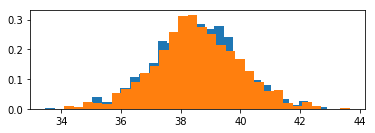

In [142]:
plt.figure(1)
plt.subplot(211)
count, bins, ignored = plt.hist(d1, 30, normed=True)
plt.figure(1)
plt.subplot(211)
count, bins, ignored = plt.hist(d2, 30, normed=True)

# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                  np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#            linewidth=2, color='r')
plt.show()

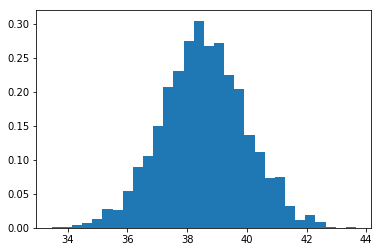

In [143]:
# one way to model the null hypothesis is by permutations, shuffle values of the two distributions and treat them as one
d_all = [i for i in d1] + [ i for i in d2]
np.random.shuffle(d_all)
count, bins, ignored = plt.hist(d_all, 30, normed=True)
plt.show()

In [144]:
def run_null_hypothesis(d1, d2):
    """the model of Null hypothesis - treat the two distributions as one"""
    d_all = [i for i in d1] + [ i for i in d2]
    np.random.shuffle(d_all)
    return (d_all[:len(d1)], d_all[len(d1):])

def test_statistic(d1, d2):
    """Computes the test statistic"""
    test_stat = abs(np.mean(d1) - np.mean(d2))
    return test_stat

In [145]:
test_stat_H0 = test_statistic(*run_null_hypothesis(d1, d2))
test_stat_H1 = test_statistic(d1, d2)
print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 0.013518860691434043
Test Statistic for Hypothesis H1: 0.016528175458191185


In [146]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(*run_null_hypothesis(d1, d2)) for _ in range(N_ITER)]
p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.802


In [147]:
# The p-value here is not small. 
# It means that we expect by chance to see an effect as big as the observed about 80% of time.

## USE-CASE: Testing a Correlation

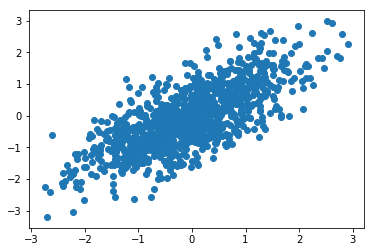

In [171]:
data = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], 1000)
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y)

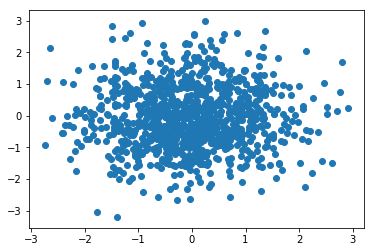

In [172]:
# we can make the null hypothesis model just by shuffling the data of one variable
x2 = x.copy()
np.random.shuffle(x2)
plt.scatter(x2, y)

In [173]:
def run_null_hypothesis(x, y):
    """the model of Null hypothesis - treat the two distributions as one"""
    x2 = x.copy()
    np.random.shuffle(x2)
    return (x2, y)

def test_statistic(x, y):
    """Computes the test statistic"""
    test_stat = abs(np.corrcoef(x, y)[0][1])
    return test_stat

In [174]:
test_stat_H0 = test_statistic(*run_null_hypothesis(x, y))
test_stat_H1 = test_statistic(x, y)
print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 0.03684180368315462
Test Statistic for Hypothesis H1: 0.7331483005590949


In [175]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(*run_null_hypothesis(d1, d2)) for _ in range(N_ITER)]
p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.0


## USE-CASE: Testing Proportions with chi2 test
- Above we used total deviation as test statistic Sum(abs(observed-expected))
- It is more common to use chi2 statistic. Sum((observed-expected)^2/expected)

Lets see how what results we get having chi2 statistic

In [176]:
observations = {1:8, 2:9, 3:19, 4:5, 5:8, 6:11}

observations_frequencies = np.array(observations.values())
n_dice_drops = np.sum(observations_frequencies)
print n_dice_drops

60


In [181]:
def run_null_hypothesis(n_dice_drops):
    """the model of Null hypothesis"""
    dice_values = [1, 2, 3, 4, 5, 6]
    rolls = np.random.choice(dice_values, n_dice_drops, replace=True)
    return np.array(dict(pd.DataFrame(rolls)[0].value_counts()).values())

def test_statistic(dice_frequencies, n_dice_drops):
    """Computes the test statistic"""
    expected_frequencies = np.ones(6) * n_dice_drops / 6.
    return sum( (dice_frequencies - expected_frequencies)**2 / expected_frequencies)

In [182]:
test_stat_H0 = test_statistic(run_null_hypothesis(n_dice_drops), n_dice_drops)
test_stat_H1 = test_statistic(observations_frequencies, n_dice_drops)
print "Test Statistic for Null Hypothesis H0:",  test_stat_H0
print "Test Statistic for Hypothesis H1:",  test_stat_H1

Test Statistic for Null Hypothesis H0: 18.2
Test Statistic for Hypothesis H1: 11.6


In [183]:
# we perform iterations for good statistics
N_ITER = 1000
test_stat_H0_v = [test_statistic(run_null_hypothesis(n_dice_drops), n_dice_drops) for _ in range(N_ITER)]

p_value = 1. * sum([1 for test_stat_H0 in test_stat_H0_v if test_stat_H0 >= test_stat_H1])/N_ITER
print "The p-value is: ", p_value

The p-value is:  0.037


- we see that the p-value is smaller using the chi2 statistic as test statistic.
=> This is very important point since we see that the chioice of t-statistic affects quite a lot the p-value

## USE-CASE: Testing Structures in Histograms
e.g.understand if we have signal over background


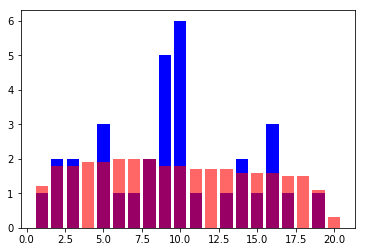

In [206]:
# Lets say we have already a histogram with the bins values below:
x_obs = {1:1, 2:2, 3:2,  4:0, 5:3, 6:1, 7:1, 8:2, 9:5, 10:6,
         11:1, 12:0, 13:1, 14:2, 15:1, 16:3, 17:1, 18:0, 19:1, 20:0}
x_bgr = {1:1.2, 2:1.8, 3:1.8,  4:1.9, 5:1.9, 6:2, 7:2, 8:2, 9:1.8, 10:1.8,
         11:1.7, 12:1.7, 13:1.7, 14:1.6, 15:1.6, 16:1.6, 17:1.5, 18:1.5, 19:1.1, 20:0.3}

_ = plt.bar(x_obs.keys(), x_obs.values(), color='b')
_ = plt.bar(x_bgr.keys(), x_bgr.values(), alpha=0.6, color='r')

In [209]:
# lets say that the red is what we know as background (e.g. from monde carlo) and blue is the observed signal.
# Is this signal statistical significant ?

In [ ]:
# The H0 would say that both those distributions come from the same process. 
# So we can construct the H0 model by adding those values and then splitting them in two parts. 

- lets focus only in the bin 9 with signal value = 5
How likelie it is to find nobs = 5 while a backgronud is 1.8 ?

The number of entries $n_s$ in a bar can be treated as a Poisson variable with mean $\nu_s$.
In this scenario we can calculate the p-value as 
$P(n>= n_{obs}) = \Sigma_{n=n_{obs}}^{\infty} pmf_{poisson}(n;\nu_s=0, \nu_b) = 1 - \Sigma_{n=0}^{n_{obs}-1} pmf_{poisson}(n;\nu_s=0, \nu_b) $

In [234]:
from scipy import stats
pmf_values = []
N_obs = 5
N_bgr = 1.8
for i in range(0, N_obs-1):
    pmf_values.append(stats.distributions.poisson.pmf(i, N_bgr))
pval = 1-np.sum(pmf_values)    
print 'The p-value is ', pval

The p-value is  0.10870839470920524


- a point to keep in mind is that the background comes with uncertainty so we eventually have a range of p-values

In principle we can apply the procedure above to the number of entries in a subset of bins. E.g. in the two bings with large peak we have $n_{obs}=11$ with expected $\nu_b=3.2$. 

In [235]:
from scipy import stats
pmf_values = []
N_obs = 11
N_bgr = 3.2
for i in range(0, N_obs-1):
    pmf_values.append(stats.distributions.poisson.pmf(i, N_bgr))
pval = 1-np.sum(pmf_values)    
print 'The p-value is ', pval

The p-value is  0.0017618878681848749


- Usually though, we do not know a priori where a peak might appear. In order to give more meaningful statement of how unexpected the peak is we should give the probability of observing a discrepancy as improbable as the peak in any of the bins of the histogram.

- A last thing to keep in mind is that different bin size will lead to differnt p-value. A typical practive is to define the width of the peak region ot be at least several times the expected resolution of the variable x